<a href="https://colab.research.google.com/github/sledhead/simple_python/blob/main/webpage_scrapv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Required Modules


*   Link to Google Drive
*   Install Modules to interact with xml
*   Link Required libraries



In [12]:
import pandas as pd
import requests
#Will display upload box to user to allow a file to upload and encrypted.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
!pip install xmltodict

In [3]:
import xmltodict

In [4]:
import time
import os
import shutil

# Senator Vote Records


*   Get the senator vote records for each session
*   Convert the records into individual vote tallies
*   Provide User with ability to control time period



Section below will gather xml file for each year of the senate vote....
2017 to current

In [5]:
#allow the user the choice to define the begin years and end years....
#https://www.senate.gov/legislative/votes_new.htm
#build a list from the site above....
#will start with 1990 and work forward to current day
#1990 = vote_menu_101_1.xml

def combine_nums(cong_id,sess_id):
  combine_str = str(cong_id) + '_' + str(sess_id)
  return combine_str

year_lst = range(1989,2025,1)
congress_id_lst = range(101,119,1)
session_lst = [1,2]

congress_session_lst = [ [combine_nums(congress_id_num, session_id) for session_id in session_lst ] for congress_id_num in congress_id_lst ]
flatten_congress_session_lst = [ final_out for pair in congress_session_lst for final_out in pair ]
#flatten_list = [j for sub in ini_list for j in sub]
#zip()

combine_congress_year = zip(year_lst,flatten_congress_session_lst)
vote_menu_dict = {}

for year_num in combine_congress_year:
  vote_menu_dict[year_num[0]] = 'vote_menu_' + year_num[1] + '.xml'


In [6]:
# @title Please Select the Year Range  Min to Max { display-mode: "form" }

min_year = '2017' # @param ['1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']
max_year = '2024' # @param ['1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']

#build list of full file path required by the user:
#take the min and max and build a range of year required
year_num_req = range(int(min_year),(int(max_year)+1),1)
base_web_link = 'https://www.senate.gov/legislative/LIS/roll_call_lists/'

web_link_lst = []
for each_yr in year_num_req:
  file_name_part = vote_menu_dict[each_yr]
  complete_path = base_web_link + file_name_part
  web_link_lst.append(complete_path)


#now get the requested files from website....

for single_web_link in web_link_lst:
  !wget { single_web_link }


--2024-06-25 06:02:51--  https://www.senate.gov/legislative/LIS/roll_call_lists/vote_menu_115_1.xml
Resolving www.senate.gov (www.senate.gov)... 23.50.32.16, 2600:1407:a800:5a7::1e3, 2600:1407:a800:58a::1e3
Connecting to www.senate.gov (www.senate.gov)|23.50.32.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/xml]
Saving to: ‘vote_menu_115_1.xml’

vote_menu_115_1.xml     [ <=>                ] 149.40K  --.-KB/s    in 0.03s   

2024-06-25 06:02:51 (4.39 MB/s) - ‘vote_menu_115_1.xml’ saved [152990]

--2024-06-25 06:02:51--  https://www.senate.gov/legislative/LIS/roll_call_lists/vote_menu_115_2.xml
Resolving www.senate.gov (www.senate.gov)... 23.50.32.16, 2600:1407:a800:5a7::1e3, 2600:1407:a800:58a::1e3
Connecting to www.senate.gov (www.senate.gov)|23.50.32.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/xml]
Saving to: ‘vote_menu_115_2.xml’

vote_menu_115_2.xml     [ <=>                ] 129.96K 

In [7]:
print(year_num_req)
for s in year_num_req:
  print(s)

range(2017, 2025)
2017
2018
2019
2020
2021
2022
2023
2024


Code Below has been replaced by friendlier code above.... more automatic...

In [ ]:
!wget https://www.senate.gov/legislative/LIS/roll_call_lists/vote_menu_115_1.xml
!wget https://www.senate.gov/legislative/LIS/roll_call_lists/vote_menu_115_2.xml

!wget https://www.senate.gov/legislative/LIS/roll_call_lists/vote_menu_116_1.xml
!wget https://www.senate.gov/legislative/LIS/roll_call_lists/vote_menu_116_2.xml

!wget https://www.senate.gov/legislative/LIS/roll_call_lists/vote_menu_117_1.xml
!wget https://www.senate.gov/legislative/LIS/roll_call_lists/vote_menu_117_2.xml

!wget https://www.senate.gov/legislative/LIS/roll_call_lists/vote_menu_118_1.xml
!wget https://www.senate.gov/legislative/LIS/roll_call_lists/vote_menu_118_2.xml

--2024-06-01 02:02:05--  https://www.senate.gov/legislative/LIS/roll_call_lists/vote_menu_115_1.xml
Resolving www.senate.gov (www.senate.gov)... 23.39.6.104, 2600:1408:ec00:485::1e3, 2600:1408:ec00:481::1e3
Connecting to www.senate.gov (www.senate.gov)|23.39.6.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/xml]
Saving to: ‘vote_menu_115_1.xml’

vote_menu_115_1.xml     [ <=>                ] 149.40K  --.-KB/s    in 0.03s   

2024-06-01 02:02:06 (4.32 MB/s) - ‘vote_menu_115_1.xml’ saved [152990]

--2024-06-01 02:02:06--  https://www.senate.gov/legislative/LIS/roll_call_lists/vote_menu_115_2.xml
Resolving www.senate.gov (www.senate.gov)... 23.39.6.104, 2600:1408:ec00:485::1e3, 2600:1408:ec00:481::1e3
Connecting to www.senate.gov (www.senate.gov)|23.39.6.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/xml]
Saving to: ‘vote_menu_115_2.xml’

vote_menu_115_2.xml     [ <=>                ] 129.96K 

Next Section below will open xml and then use this file to build the list of file links for gather senator votes

In [8]:

#Base file path for local folder struct in vm
current_dir = os.getcwd()
local_base_folder_path = os.path.join(current_dir,'Senator_data')
if( os.path.exists(local_base_folder_path) == False ):
  os.makedirs(local_base_folder_path)

congress_session_folder_names = []
full_http_link_file_path = []
each_vote_info = []
#vote_menu_file_lst = ['vote_menu_115_1.xml','vote_menu_115_2.xml','vote_menu_116_1.xml','vote_menu_116_2.xml','vote_menu_117_1.xml','vote_menu_117_2.xml','vote_menu_118_1.xml','vote_menu_118_2.xml']

#for each_year_call_lst in vote_menu_file_lst:
for each_year in year_num_req:
  file_name_part = vote_menu_dict[each_year]

  xml_file = open(file_name_part, 'r')
  xml_data_str = xml_file.read()

  xml_to_dict_obj = xmltodict.parse(xml_data_str)

  congress_num = xml_to_dict_obj['vote_summary']['congress']
  congress_sec_num = xml_to_dict_obj['vote_summary']['session']

  congress_lst_vote = xml_to_dict_obj['vote_summary']['votes']['vote']



  base_link_path = 'https://www.senate.gov/legislative/LIS/roll_call_votes/'
  full_base_link_path = base_link_path + 'vote' + str(congress_num) + str(congress_sec_num) + '/vote_' + str(congress_num) + '_' + str(congress_sec_num) + '_'
  congress_session_folder_names.append('vote_' + str(congress_num) + '_' + str(congress_sec_num))
  print(full_base_link_path)

  for each_vote_section in congress_lst_vote:
    single_vote_num = each_vote_section['vote_number']
    single_vote_info_dict = {}
    #build full link path for getting xml data....
    #https://www.senate.gov/legislative/LIS/roll_call_votes/vote1172/vote_117_2_00420.htm

    single_file_link_path = full_base_link_path + str(single_vote_num) + '.xml'
    full_http_link_file_path.append(single_file_link_path)
    single_vote_info_dict['full_http_path'] = single_file_link_path
    single_vote_info_dict['dest_folder'] = 'vote_' + str(congress_num) + '_' + str(congress_sec_num)
    single_vote_info_dict['file_name'] = 'vote_' + str(congress_num) + '_' + str(congress_sec_num) + '_' + str(single_vote_num) + '.xml'
    each_vote_info.append(single_vote_info_dict)


#section will build the temp folder directory struct for this vm instanse
print('..............................................................')
for new_folder_name in congress_session_folder_names:
  #build new folder path and make
  local_folder_path = os.path.join(current_dir,'Senator_data',new_folder_name)
  if( os.path.exists(local_folder_path) == False ):
    print(f'The following folder was added: {local_folder_path}')
    os.makedirs(local_folder_path)


https://www.senate.gov/legislative/LIS/roll_call_votes/vote1151/vote_115_1_
https://www.senate.gov/legislative/LIS/roll_call_votes/vote1152/vote_115_2_
https://www.senate.gov/legislative/LIS/roll_call_votes/vote1161/vote_116_1_
https://www.senate.gov/legislative/LIS/roll_call_votes/vote1162/vote_116_2_
https://www.senate.gov/legislative/LIS/roll_call_votes/vote1171/vote_117_1_
https://www.senate.gov/legislative/LIS/roll_call_votes/vote1172/vote_117_2_
https://www.senate.gov/legislative/LIS/roll_call_votes/vote1181/vote_118_1_
https://www.senate.gov/legislative/LIS/roll_call_votes/vote1182/vote_118_2_
..............................................................
The following folder was added: /content/Senator_data/vote_115_1
The following folder was added: /content/Senator_data/vote_115_2
The following folder was added: /content/Senator_data/vote_116_1
The following folder was added: /content/Senator_data/vote_116_2
The following folder was added: /content/Senator_data/vote_117_1
The 

In [28]:
# @title Please select local file storage only or local plus drive backup { display-mode: "form" }

location = 'drive_backup' # @param ['local_only','drive_backup']
backup_path = '/content/drive/MyDrive/Encryption_test/Senator_data' # @param {type:"string"}


for single_vote_xml_file in each_vote_info:
  #get the request xml data files
  #get the xml data files
  if( location == 'local_only' ):
    #just store xml file on the local vm....
    local_dest_folder_path = os.path.join(current_dir,'Senator_data',single_vote_xml_file['dest_folder'])
    !wget -P {local_dest_folder_path} {single_vote_xml_file['full_http_path']}

  if( location == 'drive_backup'):
    #more stuff to do...
    #does drive path exists???
    local_dest_folder_path = os.path.join(backup_path,single_vote_xml_file['dest_folder'])
    if( os.path.exists(local_dest_folder_path) == False ):
      os.makedirs(local_dest_folder_path)

    #before download a new copy, check and see if it exists on the drive backup...
    check_for_xml_file = os.path.join(backup_path,single_vote_xml_file['dest_folder'], single_vote_xml_file['file_name'])
    if( os.path.exists(check_for_xml_file) == False ):
      #does not exist in back_up, so download
      !wget -P {local_dest_folder_path} {single_vote_xml_file['full_http_path']}

    else:
      #file was found...
      print(f'Found:::::: {check_for_xml_file}')

Found:::::: /content/drive/MyDrive/Encryption_test/Senator_data/vote_115_1/vote_115_1_00325.xml
Found:::::: /content/drive/MyDrive/Encryption_test/Senator_data/vote_115_1/vote_115_1_00324.xml
Found:::::: /content/drive/MyDrive/Encryption_test/Senator_data/vote_115_1/vote_115_1_00323.xml
Found:::::: /content/drive/MyDrive/Encryption_test/Senator_data/vote_115_1/vote_115_1_00322.xml
Found:::::: /content/drive/MyDrive/Encryption_test/Senator_data/vote_115_1/vote_115_1_00321.xml
Found:::::: /content/drive/MyDrive/Encryption_test/Senator_data/vote_115_1/vote_115_1_00320.xml
Found:::::: /content/drive/MyDrive/Encryption_test/Senator_data/vote_115_1/vote_115_1_00319.xml
Found:::::: /content/drive/MyDrive/Encryption_test/Senator_data/vote_115_1/vote_115_1_00318.xml
Found:::::: /content/drive/MyDrive/Encryption_test/Senator_data/vote_115_1/vote_115_1_00317.xml
Found:::::: /content/drive/MyDrive/Encryption_test/Senator_data/vote_115_1/vote_115_1_00316.xml
Found:::::: /content/drive/MyDrive/Encry

# Test Section


In [ ]:
print(backup_path)

for single_vote_xml_file in each_vote_info:
  source_path = os.path.join(current_dir,'Senator_data',single_vote_xml_file['dest_folder'],single_vote_xml_file['file_name'])
  dest_path = os.path.join(backup_path,single_vote_xml_file['dest_folder'], single_vote_xml_file['file_name'])
  shutil.copyfile(source_path,dest_path)

/content/drive/MyDrive/Encryption_test/Senator_data


In [ ]:
os.getcwd()

'/content'

In [ ]:
!pwd
!rm -r Senator_data/

/content


In [ ]:
test_link = 'https://www.senate.gov/legislative/LIS/roll_call_lists/vote_menu_115_1.xml'
!wget -P {'/content/Senator_data/vote_115_1'} {test_link}

--2024-06-21 04:39:51--  https://www.senate.gov/legislative/LIS/roll_call_lists/vote_menu_115_1.xml
Resolving www.senate.gov (www.senate.gov)... 23.213.65.26, 2600:1408:7400:18e::1e3, 2600:1408:7400:1a3::1e3
Connecting to www.senate.gov (www.senate.gov)|23.213.65.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/xml]
Saving to: ‘/content/Senator_data/vote_115_1/vote_menu_115_1.xml’

vote_menu_115_1.xml     [ <=>                ] 149.40K  --.-KB/s    in 0.006s  

2024-06-21 04:39:51 (23.6 MB/s) - ‘/content/Senator_data/vote_115_1/vote_menu_115_1.xml’ saved [152990]



In [ ]:
print(congress_id_lst)
print(type(congress_session_lst))

for single_y in congress_session_lst:
  print(single_y)

print(type(combine_congress_year))

for each_s in combine_congress_year:
  print(each_s)

range(101, 119)
<class 'list'>
['101_1', '101_2']
['102_1', '102_2']
['103_1', '103_2']
['104_1', '104_2']
['105_1', '105_2']
['106_1', '106_2']
['107_1', '107_2']
['108_1', '108_2']
['109_1', '109_2']
['110_1', '110_2']
['111_1', '111_2']
['112_1', '112_2']
['113_1', '113_2']
['114_1', '114_2']
['115_1', '115_2']
['116_1', '116_2']
['117_1', '117_2']
['118_1', '118_2']
<class 'zip'>
(1989, '101_1')
(1990, '101_2')
(1991, '102_1')
(1992, '102_2')
(1993, '103_1')
(1994, '103_2')
(1995, '104_1')
(1996, '104_2')
(1997, '105_1')
(1998, '105_2')
(1999, '106_1')
(2000, '106_2')
(2001, '107_1')
(2002, '107_2')
(2003, '108_1')
(2004, '108_2')
(2005, '109_1')
(2006, '109_2')
(2007, '110_1')
(2008, '110_2')
(2009, '111_1')
(2010, '111_2')
(2011, '112_1')
(2012, '112_2')
(2013, '113_1')
(2014, '113_2')
(2015, '114_1')
(2016, '114_2')
(2017, '115_1')
(2018, '115_2')
(2019, '116_1')
(2020, '116_2')
(2021, '117_1')
(2022, '117_2')
(2023, '118_1')
(2024, '118_2')


In [ ]:
sit = congress_session_lst[3]
print(sit)
print(type(sit))
str_sit = str(sit)
print(type(str_sit))
print(str_sit)

print(flatten_congress_session_lst)

print(combine_congress_year)
for each_row in combine_congress_year:
  print(each_row)

['104_1', '104_2']
<class 'list'>
<class 'str'>
['104_1', '104_2']
['101_1', '101_2', '102_1', '102_2', '103_1', '103_2', '104_1', '104_2', '105_1', '105_2', '106_1', '106_2', '107_1', '107_2', '108_1', '108_2', '109_1', '109_2', '110_1', '110_2', '111_1', '111_2', '112_1', '112_2', '113_1', '113_2', '114_1', '114_2', '115_1', '115_2', '116_1', '116_2', '117_1', '117_2', '118_1', '118_2']
(1989, '101_1')
(1990, '101_2')
(1991, '102_1')
(1992, '102_2')
(1993, '103_1')
(1994, '103_2')
(1995, '104_1')
(1996, '104_2')
(1997, '105_1')
(1998, '105_2')
(1999, '106_1')
(2000, '106_2')
(2001, '107_1')
(2002, '107_2')
(2003, '108_1')
(2004, '108_2')
(2005, '109_1')
(2006, '109_2')
(2007, '110_1')
(2008, '110_2')
(2009, '111_1')
(2010, '111_2')
(2011, '112_1')
(2012, '112_2')
(2013, '113_1')
(2014, '113_2')
(2015, '114_1')
(2016, '114_2')
(2017, '115_1')
(2018, '115_2')
(2019, '116_1')
(2020, '116_2')
(2021, '117_1')
(2022, '117_2')
(2023, '118_1')
(2024, '118_2')


In [ ]:
s_t = (4,5)
print(type(s_t))
print(s_t[0])

print(vote_menu_dict)

temp_lst = []
for s_y in year_lst:
  temp_lst.append(str(s_y))

print(temp_lst)

<class 'tuple'>
4
{1989: 'vote_menu_101_1.xml', 1990: 'vote_menu_101_2.xml', 1991: 'vote_menu_102_1.xml', 1992: 'vote_menu_102_2.xml', 1993: 'vote_menu_103_1.xml', 1994: 'vote_menu_103_2.xml', 1995: 'vote_menu_104_1.xml', 1996: 'vote_menu_104_2.xml', 1997: 'vote_menu_105_1.xml', 1998: 'vote_menu_105_2.xml', 1999: 'vote_menu_106_1.xml', 2000: 'vote_menu_106_2.xml', 2001: 'vote_menu_107_1.xml', 2002: 'vote_menu_107_2.xml', 2003: 'vote_menu_108_1.xml', 2004: 'vote_menu_108_2.xml', 2005: 'vote_menu_109_1.xml', 2006: 'vote_menu_109_2.xml', 2007: 'vote_menu_110_1.xml', 2008: 'vote_menu_110_2.xml', 2009: 'vote_menu_111_1.xml', 2010: 'vote_menu_111_2.xml', 2011: 'vote_menu_112_1.xml', 2012: 'vote_menu_112_2.xml', 2013: 'vote_menu_113_1.xml', 2014: 'vote_menu_113_2.xml', 2015: 'vote_menu_114_1.xml', 2016: 'vote_menu_114_2.xml', 2017: 'vote_menu_115_1.xml', 2018: 'vote_menu_115_2.xml', 2019: 'vote_menu_116_1.xml', 2020: 'vote_menu_116_2.xml', 2021: 'vote_menu_117_1.xml', 2022: 'vote_menu_117_2.x

In [ ]:
print(len(full_http_link_file_path))

2822


In [ ]:
for single_file_path in full_http_link_file_path:
  print(single_file_path)



# Build Senator Dict V2

In [10]:
def GetVoteLayout(senator_vote_list):
  #Generate additional information about the over flow of the vote.
  #Determine the party majority of both yeas and nays.
  #{'yea_major':R or D, yea_R: cnt, yea_D: cnt, yea_I:cnt, nay_major: R or D, nay_R: cnt, nay_D: cnt, nay_I:cnt}
  vote_info = {}
  yea_D_lst = [single_senator for single_senator in senator_vote_list if( single_senator['party'] == 'D' and single_senator['vote_cast'] == 'Yea') == True]
  #print(len(yea_D_lst))

  yea_R_lst = [single_senator for single_senator in senator_vote_list if( single_senator['party'] == 'R' and single_senator['vote_cast'] == 'Yea') == True]
  #print(len(yea_R_lst))

  yea_I_lst = [single_senator for single_senator in senator_vote_list if( single_senator['party'] == 'I' and single_senator['vote_cast'] == 'Yea') == True]
  #print(len(yea_I_lst))

  #calulate which party has major....
  if(len(yea_D_lst) > len(yea_R_lst)):
    vote_info['yea_major'] = 'D'
  elif(len(yea_D_lst) < len(yea_R_lst)):
    vote_info['yea_major'] = 'R'
  elif(len(yea_D_lst) == len(yea_R_lst)):
    vote_info['yea_major'] = 'E'

  vote_info['yea_D'] = len(yea_D_lst)
  vote_info['yea_R'] = len(yea_R_lst)
  vote_info['yea_I'] = len(yea_I_lst)


  #print('.........................................................')

  nays_D_lst = [single_senator for single_senator in senator_vote_list if( single_senator['party'] == 'D' and single_senator['vote_cast'] == 'Nay') == True]
  #print(len(nays_D_lst))

  nays_R_lst = [single_senator for single_senator in senator_vote_list if( single_senator['party'] == 'R' and single_senator['vote_cast'] == 'Nay') == True]
  #print(len(nays_R_lst))

  nays_I_lst = [single_senator for single_senator in senator_vote_list if( single_senator['party'] == 'I' and single_senator['vote_cast'] == 'Nay') == True]
  #print(len(nays_I_lst))

  #calulate which party has major....
  if(len(nays_D_lst) > len(nays_R_lst)):
    vote_info['nay_major'] = 'D'
  elif(len(nays_D_lst) < len(nays_R_lst)):
    vote_info['nay_major'] = 'R'
  elif(len(nays_D_lst) == len(nays_R_lst)):
    vote_info['nay_major'] = 'E'

  vote_info['nay_D'] = len(nays_D_lst)
  vote_info['nay_R'] = len(nays_R_lst)
  vote_info['nay_I'] = len(nays_I_lst)

  return vote_info

Code Below will allow the user to select the Senator that will be processed for comparsion.

In [23]:
# @title Please Enter a string of Senator seperated by a comma { display-mode: "form" }

Senator_str_lst = "Daines, Tester, Cruz, Schumer, Warren, Cotton, Sanders, Menendez, Paul,Hirono" # @param {type:"string"}

#clean up the string before converting to list
clean_up_Senator_str = Senator_str_lst.replace(" ", "")
#make string into list for code below
user_defined_senator_only_lst = clean_up_Senator_str.split(sep=',')


In [29]:
missing_links = []
senator_history_lst = []

#full_http_link_file_path = ['https://www.senate.gov/legislative/LIS/roll_call_votes/vote1151/vote_115_1_00271.xml', 'https://www.senate.gov/legislative/LIS/roll_call_votes/vote1151/vote_115_1_00262.xml']
#select_only_senators = ['Daines', 'Tester', 'Cruz', 'Schumer','Warren','Cotton','Sanders', 'Menendez','Paul','Hirono']
select_only_senators = user_defined_senator_only_lst

for each_single_file_path in each_vote_info:
  #gather the data from each single file link path
  #change this code... the xml have been downloaded to local or backup
  #r = requests.get(each_single_file_link)
  #print(r.status_code)
  #print(r.text)

  #make sure we got a file....
  #depend what the user has selected for file location... local vm or backup on google drive
  if( location == 'local_only' ):
    #set base folder path to local vm...
    base_vote_folder_path =  os.path.join(current_dir,'Senator_data',each_single_file_path['dest_folder'])

  elif( location == 'drive_backup' ):
    #get files from the backup location
    base_vote_folder_path = os.path.join(backup_path,each_single_file_path['dest_folder'])

  complete_vote_file_path = os.path.join(base_vote_folder_path,each_single_file_path['file_name'])

  if(os.path.exists(complete_vote_file_path) == True ):
    vote_call_details = {}
    with open( complete_vote_file_path, 'r') as fd:
      vote_call_details = xmltodict.parse(fd.read())

    #vote_call_details = xmltodict.parse(r.text)

    congress_id_num = vote_call_details['roll_call_vote']['congress']
    congress_session_num = vote_call_details['roll_call_vote']['session']
    vote_call_num = vote_call_details['roll_call_vote']['vote_number']
    vote_call_issue = vote_call_details['roll_call_vote']['vote_title']

    #setup loop for what each senator voted...
    senator_member_lst = vote_call_details['roll_call_vote']['members']['member']
    select_senator_vote_dict = {dict['last_name']:dict['vote_cast'] for dict in senator_member_lst if (dict['last_name'] in select_only_senators) == True }
    print(f'Currently working on: Congress: {congress_id_num}, session: {congress_session_num}, vote call: {vote_call_num}')

    new_row_dict = {}
    new_row_dict['congress'] = congress_id_num
    new_row_dict['session'] = congress_session_num
    new_row_dict['vote_number'] = vote_call_num
    new_row_dict['vote_title'] = vote_call_issue

    #add section to keep track of yea and nay counts.
    new_row_dict['yea_cnt'] = vote_call_details['roll_call_vote']['count']['yeas']
    new_row_dict['nays_cnt'] = vote_call_details['roll_call_vote']['count']['nays']
    new_row_dict['vote_deep_dive'] = GetVoteLayout(senator_member_lst)

    for each_sen_record in select_only_senators:
      #print(each_sen_mem['last_name'])

      new_row_dict[each_sen_record] = select_senator_vote_dict[each_sen_record]

      #add to list for later examation
      #after building list, will add to dataframe.

    senator_history_lst.append(new_row_dict)

  else:
    #something went wrong...
    #keep track of this problem
    missing_links.append(complete_vote_file_path)

  #before moving to the next record, pause for some time....
  #time.sleep(0.25)

Currently working on: Congress: 115, session: 1, vote call: 325
Currently working on: Congress: 115, session: 1, vote call: 324
Currently working on: Congress: 115, session: 1, vote call: 323
Currently working on: Congress: 115, session: 1, vote call: 322
Currently working on: Congress: 115, session: 1, vote call: 321
Currently working on: Congress: 115, session: 1, vote call: 320
Currently working on: Congress: 115, session: 1, vote call: 319
Currently working on: Congress: 115, session: 1, vote call: 318
Currently working on: Congress: 115, session: 1, vote call: 317
Currently working on: Congress: 115, session: 1, vote call: 316
Currently working on: Congress: 115, session: 1, vote call: 315
Currently working on: Congress: 115, session: 1, vote call: 314
Currently working on: Congress: 115, session: 1, vote call: 313
Currently working on: Congress: 115, session: 1, vote call: 312
Currently working on: Congress: 115, session: 1, vote call: 311
Currently working on: Congress: 115, ses

# Test Section

In [31]:
print(len(missing_links))

0


In [11]:
each_vote_info[7]

{'full_http_path': 'https://www.senate.gov/legislative/LIS/roll_call_votes/vote1151/vote_115_1_00318.xml',
 'dest_folder': 'vote_115_1',
 'file_name': 'vote_115_1_00318.xml'}

In [22]:
print(Senator_str_lst)
clean_up = Senator_str_lst.replace(" ", "")
print(clean_up)
temp_Sen = clean_up.split(sep=',')
print(temp_Sen)

Daines, Tester, Cruz, Schumer, Warren, Cotton, Sanders, Menendez, Paul,Hirono
Daines,Tester,Cruz,Schumer,Warren,Cotton,Sanders,Menendez,Paul,Hirono
['Daines', 'Tester', 'Cruz', 'Schumer', 'Warren', 'Cotton', 'Sanders', 'Menendez', 'Paul', 'Hirono']


# Build Senator Dict

Section below will loop through list of xml files and build a dict of all the votes within the time period.  Just selected senators will be recorded.

In [ ]:
def GetVoteLayout(senator_vote_list):
  #Generate additional information about the over flow of the vote.
  #Determine the party majority of both yeas and nays.
  #{'yea_major':R or D, yea_R: cnt, yea_D: cnt, yea_I:cnt, nay_major: R or D, nay_R: cnt, nay_D: cnt, nay_I:cnt}
  vote_info = {}
  yea_D_lst = [single_senator for single_senator in senator_vote_list if( single_senator['party'] == 'D' and single_senator['vote_cast'] == 'Yea') == True]
  #print(len(yea_D_lst))

  yea_R_lst = [single_senator for single_senator in senator_vote_list if( single_senator['party'] == 'R' and single_senator['vote_cast'] == 'Yea') == True]
  #print(len(yea_R_lst))

  yea_I_lst = [single_senator for single_senator in senator_vote_list if( single_senator['party'] == 'I' and single_senator['vote_cast'] == 'Yea') == True]
  #print(len(yea_I_lst))

  #calulate which party has major....
  if(len(yea_D_lst) > len(yea_R_lst)):
    vote_info['yea_major'] = 'D'
  elif(len(yea_D_lst) < len(yea_R_lst)):
    vote_info['yea_major'] = 'R'
  elif(len(yea_D_lst) == len(yea_R_lst)):
    vote_info['yea_major'] = 'E'

  vote_info['yea_D'] = len(yea_D_lst)
  vote_info['yea_R'] = len(yea_R_lst)
  vote_info['yea_I'] = len(yea_I_lst)


  #print('.........................................................')

  nays_D_lst = [single_senator for single_senator in senator_vote_list if( single_senator['party'] == 'D' and single_senator['vote_cast'] == 'Nay') == True]
  #print(len(nays_D_lst))

  nays_R_lst = [single_senator for single_senator in senator_vote_list if( single_senator['party'] == 'R' and single_senator['vote_cast'] == 'Nay') == True]
  #print(len(nays_R_lst))

  nays_I_lst = [single_senator for single_senator in senator_vote_list if( single_senator['party'] == 'I' and single_senator['vote_cast'] == 'Nay') == True]
  #print(len(nays_I_lst))

  #calulate which party has major....
  if(len(nays_D_lst) > len(nays_R_lst)):
    vote_info['nay_major'] = 'D'
  elif(len(nays_D_lst) < len(nays_R_lst)):
    vote_info['nay_major'] = 'R'
  elif(len(nays_D_lst) == len(nays_R_lst)):
    vote_info['nay_major'] = 'E'

  vote_info['nay_D'] = len(nays_D_lst)
  vote_info['nay_R'] = len(nays_R_lst)
  vote_info['nay_I'] = len(nays_I_lst)

  return vote_info

In [ ]:
missing_links = []
senator_history_lst = []

#full_http_link_file_path = ['https://www.senate.gov/legislative/LIS/roll_call_votes/vote1151/vote_115_1_00271.xml', 'https://www.senate.gov/legislative/LIS/roll_call_votes/vote1151/vote_115_1_00262.xml']
select_only_senators = ['Daines', 'Tester', 'Cruz', 'Schumer','Warren','Cotton','Sanders', 'Menendez','Paul','Hirono']

for each_single_file_link in full_http_link_file_path:
  #gather the data from each single file link path
  #change this code... the xml have been downloaded to local or backup
  r = requests.get(each_single_file_link)
  #print(r.status_code)
  #print(r.text)

  #make sure we got a file....
  if(r.status_code == 200):
    vote_call_details = xmltodict.parse(r.text)

    congress_id_num = vote_call_details['roll_call_vote']['congress']
    congress_session_num = vote_call_details['roll_call_vote']['session']
    vote_call_num = vote_call_details['roll_call_vote']['vote_number']
    vote_call_issue = vote_call_details['roll_call_vote']['vote_title']

    #setup loop for what each senator voted...
    senator_member_lst = vote_call_details['roll_call_vote']['members']['member']
    select_senator_vote_dict = {dict['last_name']:dict['vote_cast'] for dict in senator_member_lst if (dict['last_name'] in select_only_senators) == True }
    print(f'Currently working on: Congress: {congress_id_num}, session: {congress_session_num}, vote call: {vote_call_num}')

    new_row_dict = {}
    new_row_dict['congress'] = congress_id_num
    new_row_dict['session'] = congress_session_num
    new_row_dict['vote_number'] = vote_call_num
    new_row_dict['vote_title'] = vote_call_issue

    #add section to keep track of yea and nay counts.
    new_row_dict['yea_cnt'] = vote_call_details['roll_call_vote']['count']['yeas']
    new_row_dict['nays_cnt'] = vote_call_details['roll_call_vote']['count']['nays']
    new_row_dict['vote_deep_dive'] = GetVoteLayout(senator_member_lst)

    for each_sen_record in select_only_senators:
      #print(each_sen_mem['last_name'])

      new_row_dict[each_sen_record] = select_senator_vote_dict[each_sen_record]

      #add to list for later examation
      #after building list, will add to dataframe.

    senator_history_lst.append(new_row_dict)

  else:
    #something went wrong...
    #keep track of this problem
    missing_links.append(full_file_link_path)

  #before moving to the next record, pause for some time....
  time.sleep(0.25)

Currently working on: Congress: 115, session: 1, vote call: 325
Currently working on: Congress: 115, session: 1, vote call: 324
Currently working on: Congress: 115, session: 1, vote call: 323
Currently working on: Congress: 115, session: 1, vote call: 322
Currently working on: Congress: 115, session: 1, vote call: 321
Currently working on: Congress: 115, session: 1, vote call: 320
Currently working on: Congress: 115, session: 1, vote call: 319
Currently working on: Congress: 115, session: 1, vote call: 318
Currently working on: Congress: 115, session: 1, vote call: 317
Currently working on: Congress: 115, session: 1, vote call: 316
Currently working on: Congress: 115, session: 1, vote call: 315
Currently working on: Congress: 115, session: 1, vote call: 314
Currently working on: Congress: 115, session: 1, vote call: 313
Currently working on: Congress: 115, session: 1, vote call: 312
Currently working on: Congress: 115, session: 1, vote call: 311
Currently working on: Congress: 115, ses

# Test Section

In [ ]:
#will use this section to test the above code.

select_only_senators = ['Daines', 'Tester', 'Cruz', 'Schumer', 'Baldwin', 'Bennet']

test_list = [{'member_full': 'Baldwin (D-WI)', 'last_name': 'Baldwin', 'first_name': 'Tammy', 'party': 'D', 'state': 'WI', 'vote_cast': 'Yea', 'lis_member_id': 'S354'}, {'member_full': 'Barrasso (R-WY)', 'last_name': 'Barrasso', 'first_name': 'John', 'party': 'R', 'state': 'WY', 'vote_cast': 'Not Voting', 'lis_member_id': 'S317'}, {'member_full': 'Bennet (D-CO)', 'last_name': 'Bennet', 'first_name': 'Michael', 'party': 'D', 'state': 'CO', 'vote_cast': 'Yea', 'lis_member_id': 'S330'}]
print(len(test_list))

select_senator_vote_dict = {dict['last_name']:dict['vote_cast'] for dict in test_list if (dict['last_name'] in select_only_senators) == True }

print(select_senator_vote_dict)


3
{'Baldwin': 'Yea', 'Bennet': 'Yea'}


In [ ]:
print(missing_links)

for each_vote_cnt in senator_history_lst:

  print(each_vote_cnt)

[]
{'congress': '115', 'session': '1', 'vote_number': '325', 'vote_title': 'Motion to Concur in the House Amendment to the Senate Amendment to H.R. 1370', 'yea_cnt': '66', 'nays_cnt': '32', 'Daines': 'Yea', 'Tester': 'Yea', 'Cruz': 'Yea', 'Schumer': 'Nay', 'Warren': 'Nay', 'Cotton': 'Yea', 'Sanders': 'Nay', 'Menendez': 'Nay', 'Paul': 'Nay', 'Hirono': 'Nay'}
{'congress': '115', 'session': '1', 'vote_number': '324', 'vote_title': 'Motion to Waive All Applicable Budgetary Discipline Re: The Motion to Concur in the House Amendment to the Senate Amendment to H.R. 1370', 'yea_cnt': '91', 'nays_cnt': '8', 'Daines': 'Yea', 'Tester': 'Yea', 'Cruz': 'Nay', 'Schumer': 'Yea', 'Warren': 'Yea', 'Cotton': 'Yea', 'Sanders': 'Yea', 'Menendez': 'Yea', 'Paul': 'Nay', 'Hirono': 'Yea'}
{'congress': '115', 'session': '1', 'vote_number': '323', 'vote_title': 'Motion to Recede from the Senate Amendment to H.R. 1 and Concur with Further Amendment', 'yea_cnt': '51', 'nays_cnt': '48', 'Daines': 'Yea', 'Tester': 

In [ ]:
print(missing_links)
print(len(senator_history_lst))
print(senator_history_lst[155])

[]
2802
{'congress': '115', 'session': '1', 'vote_number': '170', 'vote_title': 'Donnelly Motion to Commit H.R. 1628 with Instructions', 'yea_cnt': '48', 'nays_cnt': '52', 'vote_deep_dive': {'yea_major': 'D', 'yea_D': 46, 'yea_R': 0, 'yea_I': 2, 'nay_major': 'R', 'nay_D': 0, 'nay_R': 52, 'nay_I': 0}, 'Daines': 'Nay', 'Tester': 'Yea', 'Cruz': 'Nay', 'Schumer': 'Yea', 'Warren': 'Yea', 'Cotton': 'Nay', 'Sanders': 'Yea', 'Menendez': 'Yea', 'Paul': 'Nay', 'Hirono': 'Yea'}


In [ ]:
print(vote_call_details['roll_call_vote'].keys())
print(vote_call_details['roll_call_vote']['count'])
print(vote_call_details['roll_call_vote']['count']['yeas'])
print(vote_call_details['roll_call_vote']['members']['member'])

dict_keys(['congress', 'session', 'congress_year', 'vote_number', 'vote_date', 'modify_date', 'vote_question_text', 'vote_document_text', 'vote_result_text', 'question', 'vote_title', 'majority_requirement', 'vote_result', 'document', 'amendment', 'count', 'tie_breaker', 'members'])
{'yeas': '73', 'nays': '15', 'present': None, 'absent': '12'}
73
[{'member_full': 'Baldwin (D-WI)', 'last_name': 'Baldwin', 'first_name': 'Tammy', 'party': 'D', 'state': 'WI', 'vote_cast': 'Yea', 'lis_member_id': 'S354'}, {'member_full': 'Barrasso (R-WY)', 'last_name': 'Barrasso', 'first_name': 'John', 'party': 'R', 'state': 'WY', 'vote_cast': 'Not Voting', 'lis_member_id': 'S317'}, {'member_full': 'Bennet (D-CO)', 'last_name': 'Bennet', 'first_name': 'Michael', 'party': 'D', 'state': 'CO', 'vote_cast': 'Yea', 'lis_member_id': 'S330'}, {'member_full': 'Blackburn (R-TN)', 'last_name': 'Blackburn', 'first_name': 'Marsha', 'party': 'R', 'state': 'TN', 'vote_cast': 'Yea', 'lis_member_id': 'S396'}, {'member_full

In [ ]:
print(len(senator_member_lst))
yea_D_lst = [single_senator for single_senator in senator_member_lst if( single_senator['party'] == 'D' and single_senator['vote_cast'] == 'Yea') == True]
print(len(yea_D_lst))

yea_R_lst = [single_senator for single_senator in senator_member_lst if( single_senator['party'] == 'R' and single_senator['vote_cast'] == 'Yea') == True]
print(len(yea_R_lst))

yea_I_lst = [single_senator for single_senator in senator_member_lst if( single_senator['party'] == 'I' and single_senator['vote_cast'] == 'Yea') == True]
print(len(yea_I_lst))

print('.........................................................')

nays_D_lst = [single_senator for single_senator in senator_member_lst if( single_senator['party'] == 'D' and single_senator['vote_cast'] == 'Nay') == True]
print(len(nays_D_lst))

nays_R_lst = [single_senator for single_senator in senator_member_lst if( single_senator['party'] == 'R' and single_senator['vote_cast'] == 'Nay') == True]
print(len(nays_R_lst))

nays_I_lst = [single_senator for single_senator in senator_member_lst if( single_senator['party'] == 'I' and single_senator['vote_cast'] == 'Nay') == True]
print(len(nays_I_lst))

100
45
25
3
.........................................................
0
15
0


In [ ]:
print(len(senator_history_lst))
print(senator_history_lst[785])

2802
{'congress': '116', 'session': '1', 'vote_number': '242', 'vote_title': 'Motion to Invoke Cloture: Mark T. Pittman to be U.S. District Judge for the Northern District of Texas', 'yea_cnt': '54', 'nays_cnt': '34', 'vote_deep_dive': {'yea_major': 'R', 'yea_D': 3, 'yea_R': 51, 'yea_I': 0, 'nay_major': 'D', 'nay_D': 33, 'nay_R': 0, 'nay_I': 1}, 'Daines': 'Yea', 'Tester': 'Nay', 'Cruz': 'Yea', 'Schumer': 'Nay', 'Warren': 'Not Voting', 'Cotton': 'Yea', 'Sanders': 'Not Voting', 'Menendez': 'Nay', 'Paul': 'Yea', 'Hirono': 'Nay'}


# Senator Track Record

In [ ]:
def Senator_compare_func(test_dict):
  #each single line repesent a vote for certain senators in congress
  transform_new_row = {}

  #congress year
  transform_new_row['congress'] = test_dict['congress']
  #session number
  transform_new_row['session'] = test_dict['session']
  #vote number
  transform_new_row['vote_number'] = test_dict['vote_number']

  #do simple conparison of senator
  #Daines and Tester
  if( (test_dict['Daines']) == (test_dict['Tester']) ):
    transform_new_row['Daines_Tester'] = 1

  else:
    transform_new_row['Daines_Tester'] = 0

  #Daines and Rep Group
  if( (test_dict['Daines'] == test_dict['Cruz']) and (test_dict['Daines'] == test_dict['Cotton']) ):
    transform_new_row['Daines_Rep_Group'] = 1

  else:
    transform_new_row['Daines_Rep_Group'] = 0

  #Tester and Dem Group
  if( (test_dict['Tester'] == test_dict['Schumer']) and (test_dict['Tester'] == test_dict['Menendez']) ):
    transform_new_row['Tester_Dem_Group'] = 1

  else:
    transform_new_row['Tester_Dem_Group'] = 0

  #compare Daines = Tester but not Schumer
  if( (test_dict['Daines'] == test_dict['Tester']) and (test_dict['Schumer'] != test_dict['Daines']) ):
    transform_new_row['Daines_Tester_Schemer'] = 1

  else:
    transform_new_row['Daines_Tester_Schemer'] = 0


  r_vote_pos = 'N/A'
  d_vote_pos = 'N/A'

  if( test_dict['vote_deep_dive']['yea_R'] > test_dict['vote_deep_dive']['nay_R']):
    r_vote_pos = 'Yea'
  elif( test_dict['vote_deep_dive']['yea_R'] < test_dict['vote_deep_dive']['nay_R']):
    r_vote_pos = 'Nay'
  elif( test_dict['vote_deep_dive']['yea_R'] == test_dict['vote_deep_dive']['nay_R']):
    if(test_dict['vote_deep_dive']['yea_D'] > test_dict['vote_deep_dive']['nay_D']):
      r_vote_pos = 'Nay'
    else:
      r_vote_pos = 'Yea'


  if( test_dict['vote_deep_dive']['yea_D'] > test_dict['vote_deep_dive']['nay_D']):
    d_vote_pos = 'Yea'
  elif( test_dict['vote_deep_dive']['yea_D'] < test_dict['vote_deep_dive']['nay_D']):
    d_vote_pos = 'Nay'
  elif( test_dict['vote_deep_dive']['yea_D'] == test_dict['vote_deep_dive']['nay_D']):
    if(test_dict['vote_deep_dive']['yea_R'] > test_dict['vote_deep_dive']['nay_R']):
      d_vote_pos = 'Nay'
    else:
      d_vote_pos = 'Yea'

  if( (test_dict['Daines'] == 'Yea' and r_vote_pos == 'Yea') or (test_dict['Daines'] == 'Nay' and r_vote_pos == 'Nay') ):
    transform_new_row['Daines_Vote_A_Party'] = 0
  elif( (test_dict['Daines'] == 'Yea' and r_vote_pos == 'Nay') or (test_dict['Daines'] == 'Nay' and r_vote_pos == 'Yea') ):
    transform_new_row['Daines_Vote_A_Party'] = 1
  else:
    transform_new_row['Daines_Vote_A_Party'] = 9


  if( (test_dict['Tester'] == 'Yea' and d_vote_pos == 'Yea') or (test_dict['Tester'] == 'Nay' and d_vote_pos == 'Nay') ):
    transform_new_row['Tester_Vote_A_Party'] = 0
  elif( (test_dict['Tester'] == 'Yea' and d_vote_pos == 'Nay') or (test_dict['Tester'] == 'Nay' and d_vote_pos == 'Yea') ):
    transform_new_row['Tester_Vote_A_Party'] = 1
  else:
    transform_new_row['Tester_Vote_A_Party'] = 9

  #how many times did Daines vote against the R majority....


  return transform_new_row

In [ ]:
simple_senator_compare = [Senator_compare_func(dict_obj) for dict_obj in senator_history_lst]

# Test Section

In [ ]:
print(len(simple_senator_compare))

2802


In [ ]:
print(simple_senator_compare[376])
print(senator_history_lst[376])

{'congress': '115', 'session': '2', 'vote_number': '223', 'Daines_Tester': 0, 'Daines_Rep_Group': 0, 'Tester_Dem_Group': 1, 'Daines_Tester_Schemer': 0, 'Daines_Vote_A_Party': 9, 'Tester_Vote_A_Party': 0}
{'congress': '115', 'session': '2', 'vote_number': '223', 'vote_title': 'Confirmation Brett M. Kavanaugh, of Maryland, to be an Associate Justice of the Supreme Court of the United States', 'yea_cnt': '50', 'nays_cnt': '48', 'vote_deep_dive': {'yea_major': 'R', 'yea_D': 1, 'yea_R': 49, 'yea_I': 0, 'nay_major': 'D', 'nay_D': 46, 'nay_R': 0, 'nay_I': 2}, 'Daines': 'Not Voting', 'Tester': 'Nay', 'Cruz': 'Yea', 'Schumer': 'Nay', 'Warren': 'Nay', 'Cotton': 'Yea', 'Sanders': 'Nay', 'Menendez': 'Nay', 'Paul': 'Yea', 'Hirono': 'Nay'}


In [ ]:
print(simple_senator_compare[239])
how_big = [dict_obj for dict_obj in simple_senator_compare if dict_obj['Daines_Tester_Schemer'] == 1]
print(len(how_big))

how_big = [dict_obj for dict_obj in simple_senator_compare if dict_obj['Daines_Rep_Group'] == 1]
print(len(how_big))

how_big = [dict_obj for dict_obj in simple_senator_compare if dict_obj['Tester_Dem_Group'] == 1]
print(len(how_big))

how_big = [dict_obj for dict_obj in simple_senator_compare if dict_obj['Daines_Vote_A_Party'] == 1]
print(f'How many times Daines voted against the Rep Party {len(how_big)}')

how_big = [dict_obj for dict_obj in simple_senator_compare if dict_obj['Tester_Vote_A_Party'] == 1]
print(f'How many times Tester voted against the Dec Party {len(how_big)}')


{'congress': '115', 'session': '1', 'vote_number': '86', 'Daines_Tester': 0, 'Daines_Rep_Group': 1, 'Tester_Dem_Group': 1, 'Daines_Tester_Schemer': 0, 'Daines_Vote_A_Party': 0, 'Tester_Vote_A_Party': 0}
286
2240
2250
How many times Daines voted against the Rep Party 178
How many times Tester voted against the Dec Party 193


In [ ]:
for each_vote in how_big:
  print(each_vote)

{'congress': '115', 'session': '1', 'vote_number': '325', 'Daines_Tester': 1, 'Daines_Rep_Group': 1, 'Tester_Dem_Group': 0, 'Daines_Tester_Schemer': 1, 'Daines_Vote_A_Party': 0, 'Tester_Vote_A_Party': 1}
{'congress': '115', 'session': '1', 'vote_number': '319', 'Daines_Tester': 1, 'Daines_Rep_Group': 1, 'Tester_Dem_Group': 0, 'Daines_Tester_Schemer': 1, 'Daines_Vote_A_Party': 0, 'Tester_Vote_A_Party': 1}
{'congress': '115', 'session': '1', 'vote_number': '318', 'Daines_Tester': 1, 'Daines_Rep_Group': 1, 'Tester_Dem_Group': 0, 'Daines_Tester_Schemer': 1, 'Daines_Vote_A_Party': 0, 'Tester_Vote_A_Party': 1}
{'congress': '115', 'session': '1', 'vote_number': '305', 'Daines_Tester': 1, 'Daines_Rep_Group': 1, 'Tester_Dem_Group': 0, 'Daines_Tester_Schemer': 1, 'Daines_Vote_A_Party': 0, 'Tester_Vote_A_Party': 1}
{'congress': '115', 'session': '1', 'vote_number': '304', 'Daines_Tester': 1, 'Daines_Rep_Group': 1, 'Tester_Dem_Group': 0, 'Daines_Tester_Schemer': 1, 'Daines_Vote_A_Party': 0, 'Teste

In [ ]:
for st in simple_senator_compare:
  print(st)

{'congress': '115', 'session': '1', 'vote_number': '325', 'Daines_Tester': 1, 'Daines_Rep_Group': 1, 'Tester_Dem_Group': 0, 'Daines_Tester_Schemer': 1, 'Daines_Vote_A_Party': 0, 'Tester_Vote_A_Party': 1}
{'congress': '115', 'session': '1', 'vote_number': '324', 'Daines_Tester': 1, 'Daines_Rep_Group': 0, 'Tester_Dem_Group': 1, 'Daines_Tester_Schemer': 0, 'Daines_Vote_A_Party': 0, 'Tester_Vote_A_Party': 0}
{'congress': '115', 'session': '1', 'vote_number': '323', 'Daines_Tester': 0, 'Daines_Rep_Group': 1, 'Tester_Dem_Group': 1, 'Daines_Tester_Schemer': 0, 'Daines_Vote_A_Party': 0, 'Tester_Vote_A_Party': 0}
{'congress': '115', 'session': '1', 'vote_number': '322', 'Daines_Tester': 0, 'Daines_Rep_Group': 1, 'Tester_Dem_Group': 1, 'Daines_Tester_Schemer': 0, 'Daines_Vote_A_Party': 0, 'Tester_Vote_A_Party': 0}
{'congress': '115', 'session': '1', 'vote_number': '321', 'Daines_Tester': 0, 'Daines_Rep_Group': 1, 'Tester_Dem_Group': 1, 'Daines_Tester_Schemer': 0, 'Daines_Vote_A_Party': 0, 'Teste

In [ ]:
if( test_dict['Daines'] == 'Yea'):
    if( test_dict['vote_deep_dive']['yea_major'] == 'R'):
      if( test_dict['vote_deep_dive']['yea_R'] > test_dict['vote_deep_dive']['nay_R'] ):
        transform_new_row['Daines_Vote_A_Party'] = 0
      elif(test_dict['vote_deep_dive']['yea_R'] < test_dict['vote_deep_dive']['nay_R']):
        transform_new_row['Daines_Vote_A_Party'] = 1
      else:
        transform_new_row['Daines_Vote_A_Party'] = 0

    elif( test_dict['vote_deep_dive']['yea_major'] == 'D'):
      if( test_dict['vote_deep_dive']['yea_R'] > test_dict['vote_deep_dive']['nay_R'] ):
        transform_new_row['Daines_Vote_A_Party'] = 0
      elif(test_dict['vote_deep_dive']['yea_R'] < test_dict['vote_deep_dive']['nay_R']):
        transform_new_row['Daines_Vote_A_Party'] = 1
      else:
        transform_new_row['Daines_Vote_A_Party'] = 0

    elif( test_dict['vote_deep_dive']['yea_major'] == 'E'):
      if( test_dict['vote_deep_dive']['yea_R'] > test_dict['vote_deep_dive']['nay_R'] ):
        transform_new_row['Daines_Vote_A_Party'] = 0
      elif(test_dict['vote_deep_dive']['yea_R'] < test_dict['vote_deep_dive']['nay_R']):
        transform_new_row['Daines_Vote_A_Party'] = 1

  elif( test_dict['Daines'] == 'Nay'):
    if( test_dict['vote_deep_dive']['nay_major'] == 'R'):
      if( test_dict['vote_deep_dive']['nay_R'] > test_dict['vote_deep_dive']['yea_R'] ):
        transform_new_row['Daines_Vote_A_Party'] = 0
      elif(test_dict['vote_deep_dive']['nay_R'] < test_dict['vote_deep_dive']['yea_R']):
        transform_new_row['Daines_Vote_A_Party'] = 1
      else:
        transform_new_row['Daines_Vote_A_Party'] = 0

    elif( test_dict['vote_deep_dive']['nay_major'] == 'D'):
      if( test_dict['vote_deep_dive']['nay_R'] > test_dict['vote_deep_dive']['yea_R'] ):
        transform_new_row['Daines_Vote_A_Party'] = 0
      elif(test_dict['vote_deep_dive']['nay_R'] < test_dict['vote_deep_dive']['yea_R']):
        transform_new_row['Daines_Vote_A_Party'] = 1
      else:
        transform_new_row['Daines_Vote_A_Party'] = 0

    elif( test_dict['vote_deep_dive']['nay_major'] == 'E'):
      if( test_dict['vote_deep_dive']['nay_R'] > test_dict['vote_deep_dive']['yea_R'] ):
        transform_new_row['Daines_Vote_A_Party'] = 0
      elif(test_dict['vote_deep_dive']['nay_R'] < test_dict['vote_deep_dive']['yea_R']):
        transform_new_row['Daines_Vote_A_Party'] = 1

  else:
    transform_new_row['Daines_Vote_A_Party'] = -1



  #how many times did Tester vote against the D majority....
  if( test_dict['Tester'] == 'Yea'):
    if( test_dict['vote_deep_dive']['yea_major'] == 'R'):
      if( test_dict['vote_deep_dive']['yea_D'] > test_dict['vote_deep_dive']['nay_D'] ):
        transform_new_row['Tester_Vote_A_Party'] = 0
      elif(test_dict['vote_deep_dive']['yea_D'] < test_dict['vote_deep_dive']['nay_D']):
        transform_new_row['Tester_Vote_A_Party'] = 1
      else:
        transform_new_row['Tester_Vote_A_Party'] = 0

    elif( test_dict['vote_deep_dive']['yea_major'] == 'D'):
      if( test_dict['vote_deep_dive']['yea_D'] > test_dict['vote_deep_dive']['nay_D'] ):
        transform_new_row['Tester_Vote_A_Party'] = 0
      elif(test_dict['vote_deep_dive']['yea_D'] < test_dict['vote_deep_dive']['nay_D']):
        transform_new_row['Tester_Vote_A_Party'] = 1
      else:
        transform_new_row['Tester_Vote_A_Party'] = 0

    elif( test_dict['vote_deep_dive']['yea_major'] == 'E'):
      if( test_dict['vote_deep_dive']['yea_D'] > test_dict['vote_deep_dive']['nay_D'] ):
        transform_new_row['Tester_Vote_A_Party'] = 0
      elif(test_dict['vote_deep_dive']['yea_D'] < test_dict['vote_deep_dive']['nay_D']):
        transform_new_row['Tester_Vote_A_Party'] = 1

  elif( test_dict['Tester'] == 'Nay'):
    if( test_dict['vote_deep_dive']['nay_major'] == 'R'):
      if( test_dict['vote_deep_dive']['nay_D'] > test_dict['vote_deep_dive']['yea_D'] ):
        transform_new_row['Tester_Vote_A_Party'] = 0
      elif(test_dict['vote_deep_dive']['nay_D'] < test_dict['vote_deep_dive']['yea_D']):
        transform_new_row['Tester_Vote_A_Party'] = 1
      else:
        transform_new_row['Tester_Vote_A_Party'] = 0

    elif( test_dict['vote_deep_dive']['nay_major'] == 'D'):
      if( test_dict['vote_deep_dive']['nay_D'] > test_dict['vote_deep_dive']['yea_D'] ):
        transform_new_row['Tester_Vote_A_Party'] = 0
      elif(test_dict['vote_deep_dive']['nay_D'] < test_dict['vote_deep_dive']['yea_D']):
        transform_new_row['Tester_Vote_A_Party'] = 1
      else:
        transform_new_row['Tester_Vote_A_Party'] = 0

    elif( test_dict['vote_deep_dive']['nay_major'] == 'E'):
      if( test_dict['vote_deep_dive']['nay_D'] > test_dict['vote_deep_dive']['yea_D'] ):
        transform_new_row['Tester_Vote_A_Party'] = 0
      elif(test_dict['vote_deep_dive']['nay_D'] < test_dict['vote_deep_dive']['yea_D']):
        transform_new_row['Tester_Vote_A_Party'] = 1

  else:
    transform_new_row['Tester_Vote_A_Party'] = -1

In [ ]:
print(senator_history_lst[376])

{'congress': '115', 'session': '2', 'vote_number': '223', 'vote_title': 'Confirmation Brett M. Kavanaugh, of Maryland, to be an Associate Justice of the Supreme Court of the United States', 'yea_cnt': '50', 'nays_cnt': '48', 'vote_deep_dive': {'yea_major': 'R', 'yea_D': 1, 'yea_R': 49, 'yea_I': 0, 'nay_major': 'D', 'nay_D': 46, 'nay_R': 0, 'nay_I': 2}, 'Daines': 'Not Voting', 'Tester': 'Nay', 'Cruz': 'Yea', 'Schumer': 'Nay', 'Warren': 'Nay', 'Cotton': 'Yea', 'Sanders': 'Nay', 'Menendez': 'Nay', 'Paul': 'Yea', 'Hirono': 'Nay'}


In [ ]:
senator_range_compare = [dict_obj for dict_obj in senator_history_lst if(abs(int(dict_obj['yea_cnt']) - int(dict_obj['nays_cnt'] )) < 10) == True ]
print(len(senator_range_compare))

1062


In [ ]:
range_senator_compare = [Senator_compare_func(dict_obj) for dict_obj in senator_range_compare]

In [ ]:
how_big = [dict_obj for dict_obj in range_senator_compare if dict_obj['Daines_Tester_Schemer'] == 1]
print(len(how_big))

how_big = [dict_obj for dict_obj in range_senator_compare if dict_obj['Daines_Rep_Group'] == 1]
print(len(how_big))

how_big = [dict_obj for dict_obj in range_senator_compare if dict_obj['Tester_Dem_Group'] == 1]
print(len(how_big))

how_big = [dict_obj for dict_obj in range_senator_compare if dict_obj['Daines_Vote_A_Party'] == 1]
print(f'How many times Daines voted against the Rep Party {len(how_big)}')

how_big = [dict_obj for dict_obj in range_senator_compare if dict_obj['Tester_Vote_A_Party'] == 1]
print(f'How many times Tester voted against the Dec Party {len(how_big)}')

28
978
949
How many times Daines voted against the Rep Party 7
How many times Tester voted against the Dec Party 27


In [ ]:
for each_sp in how_big:
  print(each_sp)

{'congress': '115', 'session': '1', 'vote_number': '20', 'Daines_Tester': 1, 'Daines_Rep_Group': 0, 'Tester_Dem_Group': 0, 'Daines_Tester_Schemer': 1, 'Daines_Vote_A_Party': 0, 'Tester_Vote_A_Party': 1}
{'congress': '115', 'session': '2', 'vote_number': '174', 'Daines_Tester': 1, 'Daines_Rep_Group': 1, 'Tester_Dem_Group': 0, 'Daines_Tester_Schemer': 1, 'Daines_Vote_A_Party': 0, 'Tester_Vote_A_Party': 1}
{'congress': '115', 'session': '2', 'vote_number': '172', 'Daines_Tester': 1, 'Daines_Rep_Group': 1, 'Tester_Dem_Group': 0, 'Daines_Tester_Schemer': 1, 'Daines_Vote_A_Party': 0, 'Tester_Vote_A_Party': 1}
{'congress': '115', 'session': '2', 'vote_number': '111', 'Daines_Tester': 1, 'Daines_Rep_Group': 0, 'Tester_Dem_Group': 0, 'Daines_Tester_Schemer': 1, 'Daines_Vote_A_Party': 0, 'Tester_Vote_A_Party': 1}
{'congress': '115', 'session': '2', 'vote_number': '110', 'Daines_Tester': 1, 'Daines_Rep_Group': 0, 'Tester_Dem_Group': 0, 'Daines_Tester_Schemer': 1, 'Daines_Vote_A_Party': 0, 'Tester

# Party Balance

In [ ]:
def Compute_Party_Balance(test_dict):
  #each single line repesent a vote for certain senators in congress
  transform_new_row = {}

  #congress year
  transform_new_row['congress'] = test_dict['congress']
  #session number
  transform_new_row['session'] = test_dict['session']
  #vote number
  transform_new_row['vote_number'] = test_dict['vote_number']

  #determine the balance of each party... balance vote or one sided...
  transform_new_row['R_vote_bal'] = abs(int(test_dict['vote_deep_dive']['yea_R']) - int(test_dict['vote_deep_dive']['nay_R']))
  transform_new_row['R_vote_tot'] = int(test_dict['vote_deep_dive']['yea_R']) + int(test_dict['vote_deep_dive']['nay_R'])

  transform_new_row['D_vote_bal'] = abs(int(test_dict['vote_deep_dive']['yea_D']) - int(test_dict['vote_deep_dive']['nay_D']))
  transform_new_row['D_vote_tot'] = int(test_dict['vote_deep_dive']['yea_D']) + int(test_dict['vote_deep_dive']['nay_D'])




  return transform_new_row

In [ ]:
senate_party_balance_lst = [Compute_Party_Balance(dict_obj) for dict_obj in senator_history_lst]

# Test Section

In [ ]:
print(len(senate_party_balance_lst))
for i_index_num in range(1,15,1):
  print(senate_party_balance_lst[i_index_num])

2802
{'congress': '115', 'session': '1', 'vote_number': '324', 'R_vote_bal': 35, 'R_vote_tot': 51, 'D_vote_bal': 46, 'D_vote_tot': 46}
{'congress': '115', 'session': '1', 'vote_number': '323', 'R_vote_bal': 51, 'R_vote_tot': 51, 'D_vote_bal': 46, 'D_vote_tot': 46}
{'congress': '115', 'session': '1', 'vote_number': '322', 'R_vote_bal': 51, 'R_vote_tot': 51, 'D_vote_bal': 46, 'D_vote_tot': 46}
{'congress': '115', 'session': '1', 'vote_number': '321', 'R_vote_bal': 51, 'R_vote_tot': 51, 'D_vote_bal': 46, 'D_vote_tot': 46}
{'congress': '115', 'session': '1', 'vote_number': '320', 'R_vote_bal': 49, 'R_vote_tot': 51, 'D_vote_bal': 28, 'D_vote_tot': 46}
{'congress': '115', 'session': '1', 'vote_number': '319', 'R_vote_bal': 51, 'R_vote_tot': 51, 'D_vote_bal': 0, 'D_vote_tot': 44}
{'congress': '115', 'session': '1', 'vote_number': '318', 'R_vote_bal': 50, 'R_vote_tot': 50, 'D_vote_bal': 22, 'D_vote_tot': 44}
{'congress': '115', 'session': '1', 'vote_number': '317', 'R_vote_bal': 50, 'R_vote_to

In [ ]:
import pandas as pd

balance_df = pd.DataFrame(senate_party_balance_lst)
display(balance_df)

,congress,session,vote_number,R_vote_bal,R_vote_tot,D_vote_bal,D_vote_tot
0,115,1,325,46,50,12,46
1,115,1,324,35,51,46,46
2,115,1,323,51,51,46,46
3,115,1,322,51,51,46,46
4,115,1,321,51,51,46,46
...,...,...,...,...,...,...,...
2797,118,2,5,49,49,41,47
2798,118,2,4,45,49,47,47
2799,118,2,3,44,48,47,47
2800,118,2,2,20,48,46,46


In [ ]:
print(balance_df.index)

RangeIndex(start=0, stop=2802, step=1)


#Party Balance V2

In [ ]:
def Compute_Party_BalanceV2(test_dict):
  #each single line repesent a vote for certain senators in congress
  transform_new_row_R = {}
  transform_new_row_D = {}

  #congress year
  transform_new_row_R['congress'] = test_dict['congress']
  #session number
  transform_new_row_R['session'] = test_dict['session']
  #vote number
  transform_new_row_R['vote_number'] = test_dict['vote_number']

  #congress year
  transform_new_row_D['congress'] = test_dict['congress']
  #session number
  transform_new_row_D['session'] = test_dict['session']
  #vote number
  transform_new_row_D['vote_number'] = test_dict['vote_number']

  #determine the balance of each party... balance vote or one sided...
  transform_new_row_R['party'] = 'R'
  transform_new_row_R['vote_bal'] = abs(int(test_dict['vote_deep_dive']['yea_R']) - int(test_dict['vote_deep_dive']['nay_R']))
  transform_new_row_R['vote_tot'] = int(test_dict['vote_deep_dive']['yea_R']) + int(test_dict['vote_deep_dive']['nay_R'])

  transform_new_row_D['party'] = 'D'
  transform_new_row_D['vote_bal'] = abs(int(test_dict['vote_deep_dive']['yea_D']) - int(test_dict['vote_deep_dive']['nay_D']))
  transform_new_row_D['vote_tot'] = int(test_dict['vote_deep_dive']['yea_D']) + int(test_dict['vote_deep_dive']['nay_D'])




  return transform_new_row_R,transform_new_row_D

In [ ]:
#senate_party_balance_lst = [Compute_Party_Balance(dict_obj) for dict_obj in senator_history_lst]



special_party_balance_lst = []

for single_dict in senator_history_lst:
  #call function to get data about the party balance
  r1,d1 = Compute_Party_BalanceV2(single_dict)

  #add to list object
  special_party_balance_lst.append(r1)
  special_party_balance_lst.append(d1)



# Test Section

In [ ]:
print(len(special_party_balance_lst))

for eaa in range(1,25,1):
  print(special_party_balance_lst[eaa])


5604
{'congress': '115', 'session': '1', 'vote_number': '325', 'party': 'D', 'vote_bal': 12, 'vote_tot': 46}
{'congress': '115', 'session': '1', 'vote_number': '324', 'party': 'R', 'vote_bal': 35, 'vote_tot': 51}
{'congress': '115', 'session': '1', 'vote_number': '324', 'party': 'D', 'vote_bal': 46, 'vote_tot': 46}
{'congress': '115', 'session': '1', 'vote_number': '323', 'party': 'R', 'vote_bal': 51, 'vote_tot': 51}
{'congress': '115', 'session': '1', 'vote_number': '323', 'party': 'D', 'vote_bal': 46, 'vote_tot': 46}
{'congress': '115', 'session': '1', 'vote_number': '322', 'party': 'R', 'vote_bal': 51, 'vote_tot': 51}
{'congress': '115', 'session': '1', 'vote_number': '322', 'party': 'D', 'vote_bal': 46, 'vote_tot': 46}
{'congress': '115', 'session': '1', 'vote_number': '321', 'party': 'R', 'vote_bal': 51, 'vote_tot': 51}
{'congress': '115', 'session': '1', 'vote_number': '321', 'party': 'D', 'vote_bal': 46, 'vote_tot': 46}
{'congress': '115', 'session': '1', 'vote_number': '320', '

In [ ]:
print(senator_history_lst[0])

{'congress': '115', 'session': '1', 'vote_number': '325', 'vote_title': 'Motion to Concur in the House Amendment to the Senate Amendment to H.R. 1370', 'yea_cnt': '66', 'nays_cnt': '32', 'vote_deep_dive': {'yea_major': 'R', 'yea_D': 17, 'yea_R': 48, 'yea_I': 1, 'nay_major': 'D', 'nay_D': 29, 'nay_R': 2, 'nay_I': 1}, 'Daines': 'Yea', 'Tester': 'Yea', 'Cruz': 'Yea', 'Schumer': 'Nay', 'Warren': 'Nay', 'Cotton': 'Yea', 'Sanders': 'Nay', 'Menendez': 'Nay', 'Paul': 'Nay', 'Hirono': 'Nay'}


In [ ]:
balance_df = pd.DataFrame(special_party_balance_lst)
display(balance_df)
import numpy as np

,congress,session,vote_number,party,vote_bal,vote_tot
0,115,1,325,R,46,50
1,115,1,325,D,12,46
2,115,1,324,R,35,51
3,115,1,324,D,46,46
4,115,1,323,R,51,51
...,...,...,...,...,...,...
5599,118,2,3,D,47,47
5600,118,2,2,R,20,48
5601,118,2,2,D,46,46
5602,118,2,1,R,10,40


In [ ]:
#add new column to end of dataframe that will show the balance within each selected range.


conditions = [
    (balance_df['vote_bal'] <= 5),
    (balance_df['vote_bal'] > 5) & (balance_df['vote_bal'] <= 10),
    (balance_df['vote_bal'] > 10) & (balance_df['vote_bal'] <= 20),
    (balance_df['vote_bal'] > 20) & (balance_df['vote_bal'] <= 30),
    (balance_df['vote_bal'] > 30) & (balance_df['vote_bal'] <= 40),
    (balance_df['vote_bal'] > 40)
    ]

values = ['group_1', 'group_2', 'group_3', 'group_4','group_5','group_6']

balance_df['balance_group'] = np.select(conditions, values)
#balance_df['balance_group'] = np.select(conditions, values)


In [ ]:
display(balance_df)

,congress,session,vote_number,party,vote_bal,vote_tot,balance_group
0,115,1,325,R,46,50,group_6
1,115,1,325,D,12,46,group_3
2,115,1,324,R,35,51,group_5
3,115,1,324,D,46,46,group_6
4,115,1,323,R,51,51,group_6
...,...,...,...,...,...,...,...
5599,118,2,3,D,47,47,group_6
5600,118,2,2,R,20,48,group_3
5601,118,2,2,D,46,46,group_6
5602,118,2,1,R,10,40,group_2


In [ ]:
balance_0 = balance_df[balance_df.vote_bal == 0 ]
balance_df.describe()

,vote_bal,vote_tot
count,5604.000000,5604.000000
mean,40.091185,46.883833
std,12.466599,4.081303
min,0.000000,0.000000
25%,37.000000,45.000000
50%,45.000000,47.000000
75%,48.000000,49.000000
max,53.000000,53.000000


In [ ]:
display(balance_0)
balance_0.describe()

,congress,session,vote_number,party,vote_bal,vote_tot,balance_group
13,115,1,319,D,0,44,group_1
270,115,1,190,R,0,50,group_1
805,115,2,197,D,0,46,group_1
807,115,2,196,D,0,46,group_1
856,115,2,171,R,0,50,group_1
983,115,2,108,D,0,46,group_1
1055,115,2,72,D,0,46,group_1
1226,116,1,414,R,0,52,group_1
2025,116,1,15,D,0,44,group_1
2206,116,2,216,R,0,0,group_1


,vote_bal,vote_tot
count,21.0,21.000000
mean,0.0,28.666667
std,0.0,23.197701
min,0.0,0.000000
25%,0.0,0.000000
50%,0.0,44.000000
75%,0.0,46.000000
max,0.0,52.000000


In [ ]:
#add code to filter out the votes where vote total and vote balance are both zero.
#for example the vote for impeachment is guilty or not guilty

In [ ]:
balance_df.balance_group.unique()
balance_odd = balance_df[balance_df.balance_group == '0']
display(balance_odd)

,congress,session,vote_number,party,vote_bal,vote_tot,balance_group


In [ ]:
balance_df.groupby(['party','balance_group'])['vote_bal'].count()

party  balance_group
D      group_1            72
       group_2            51
       group_3           118
       group_4           144
       group_5           440
       group_6          1977
R      group_1            65
       group_2           116
       group_3           210
       group_4           190
       group_5           372
       group_6          1849
Name: vote_bal, dtype: int64

In [ ]:
72+51+108+131+2388+52

2802

In [ ]:
display(balance_df)

,congress,session,vote_number,party,vote_bal,vote_tot,balance_group
0,115,1,325,R,46,50,group_6
1,115,1,325,D,12,46,group_3
2,115,1,324,R,35,51,group_5
3,115,1,324,D,46,46,group_6
4,115,1,323,R,51,51,group_6
...,...,...,...,...,...,...,...
5599,118,2,3,D,47,47,group_6
5600,118,2,2,R,20,48,group_3
5601,118,2,2,D,46,46,group_6
5602,118,2,1,R,10,40,group_2


In [ ]:
cool_pivot = balance_df.pivot_table(index='balance_group',columns='party',aggfunc={'vote_bal':'count'})
display(cool_pivot)

vote_bal      
party                D     R
balance_group               
group_1             72    65
group_2             51   116
group_3            118   210
group_4            144   190
group_5            440   372
group_6           1977  1849

In [ ]:
cool_pivot.info()
how_many_rows = cool_pivot[('vote_bal','D')].sum()
print(how_many_rows)

cool_pivot_mod = cool_pivot[('vote_bal','D_per')] = ( ( cool_pivot[('vote_bal','D')] ) / how_many_rows ) * 100
cool_pivot_mod = cool_pivot[('vote_bal','R_per')] = ( ( cool_pivot[('vote_bal','R')] ) / how_many_rows ) * 100

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, group_1 to group_6
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   (vote_bal, D)  6 non-null      int64
 1   (vote_bal, R)  6 non-null      int64
dtypes: int64(2)
memory usage: 144.0+ bytes
2802


In [ ]:
display(cool_pivot)

vote_bal                            
party                D     R      D_per      R_per
balance_group                                     
group_1             72    65   2.569593   2.319772
group_2             51   116   1.820128   4.139900
group_3            118   210   4.211278   7.494647
group_4            144   190   5.139186   6.780871
group_5            440   372  15.703069  13.276231
group_6           1977  1849  70.556745  65.988580

In [ ]:
strip_cool_pivot = cool_pivot[[('vote_bal','D_per'),('vote_bal','R_per')]]
display(strip_cool_pivot)

vote_bal           
party              D_per      R_per
balance_group                      
group_1         2.569593   2.319772
group_2         1.820128   4.139900
group_3         4.211278   7.494647
group_4         5.139186   6.780871
group_5        15.703069  13.276231
group_6        70.556745  65.988580

<Axes: xlabel='balance_group'>

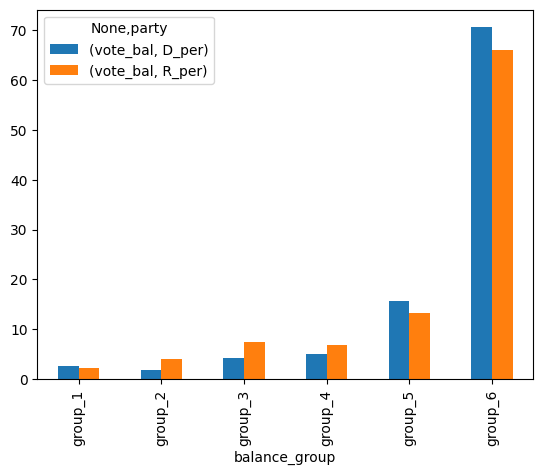

In [ ]:
strip_cool_pivot.plot(kind='bar')

# Party Balance V3

In [ ]:

def Get_Vote_Group_Bracket(y_cnt,n_cnt):
  bracket_str = ''
  idiff = abs(int(y_cnt) - int(n_cnt))

  if( idiff >= 0 and idiff < 5 ):
    bracket_str = 'vote_diff_1'
  elif( idiff >= 5 and idiff < 10 ):
    bracket_str = 'vote_diff_2'
  elif( idiff >= 10 and idiff < 15 ):
    bracket_str = 'vote_diff_3'
  elif( idiff >= 15 and idiff < 20 ):
    bracket_str = 'vote_diff_4'
  elif( idiff >= 20 and idiff < 25 ):
    bracket_str = 'vote_diff_5'
  elif( idiff >= 25 and idiff < 30 ):
    bracket_str = 'vote_diff_6'
  elif( idiff >= 30 and idiff < 35 ):
    bracket_str = 'vote_diff_7'
  elif( idiff >= 35 and idiff < 40 ):
    bracket_str = 'vote_diff_8'
  elif( idiff >= 40 ):
    bracket_str = 'vote_diff_9'

  return bracket_str


def Compute_Party_BalanceV3(test_dict):
  #each single line repesent a vote for certain senators in congress
  transform_new_row = {}

  #congress year
  transform_new_row['congress'] = test_dict['congress']
  #session number
  transform_new_row['session'] = test_dict['session']
  #vote number
  transform_new_row['vote_number'] = test_dict['vote_number']

  #show the overcount for yea and nay position
  transform_new_row['yea_cnt'] = test_dict['yea_cnt']
  transform_new_row['nays_cnt'] = test_dict['nays_cnt']

  transform_new_row['vote_spread_group'] = Get_Vote_Group_Bracket(test_dict['yea_cnt'],test_dict['nays_cnt'])

  if( int(test_dict['vote_deep_dive']['yea_R']) > int(test_dict['vote_deep_dive']['nay_R']) ):
    transform_new_row['R_major'] = 'Yea'
  elif( int(test_dict['vote_deep_dive']['yea_R']) < int(test_dict['vote_deep_dive']['nay_R']) ):
    transform_new_row['R_major'] = 'Nay'
  elif( int(test_dict['vote_deep_dive']['yea_R']) == int(test_dict['vote_deep_dive']['nay_R']) ):
    transform_new_row['R_major'] = 'equal'


  if( int(test_dict['vote_deep_dive']['yea_D']) > int(test_dict['vote_deep_dive']['nay_D']) ):
    transform_new_row['D_major'] = 'Yea'
  elif( int(test_dict['vote_deep_dive']['yea_D']) < int(test_dict['vote_deep_dive']['nay_D']) ):
    transform_new_row['D_major'] = 'Nay'
  elif( int(test_dict['vote_deep_dive']['yea_D']) == int(test_dict['vote_deep_dive']['nay_D']) ):
    transform_new_row['D_major'] = 'equal'

  if( transform_new_row['R_major'] == transform_new_row['D_major'] ):
    transform_new_row['floor_balance'] = 'in_step'
  else:
    transform_new_row['floor_balance'] = 'out_step'

  #look at Tester performance
  if( (transform_new_row['R_major'] == test_dict['Tester']) and (test_dict['Tester'] != transform_new_row['D_major']) ):
    transform_new_row['Tester_Against'] = 1
  else:
    transform_new_row['Tester_Against'] = 0


  #determine the balance of each party... balance vote or one sided...
  #transform_new_row['R_vote_bal'] = abs(int(test_dict['vote_deep_dive']['yea_R']) - int(test_dict['vote_deep_dive']['nay_R']))
  #transform_new_row['R_vote_tot'] = int(test_dict['vote_deep_dive']['yea_R']) + int(test_dict['vote_deep_dive']['nay_R'])

  #transform_new_row['D_vote_bal'] = abs(int(test_dict['vote_deep_dive']['yea_D']) - int(test_dict['vote_deep_dive']['nay_D']))
  #transform_new_row['D_vote_tot'] = int(test_dict['vote_deep_dive']['yea_D']) + int(test_dict['vote_deep_dive']['nay_D'])

  return transform_new_row

In [ ]:
senate_party_balanceV3_lst = [Compute_Party_BalanceV3(dict_obj) for dict_obj in senator_history_lst]

In [ ]:
senator_history_lst[428]

{'congress': '115',
 'session': '2',
 'vote_number': '171',
 'vote_title': 'Paul Amdt. No. 3543',
 'yea_cnt': '25',
 'nays_cnt': '74',
 'vote_deep_dive': {'yea_major': 'R',
  'yea_D': 0,
  'yea_R': 25,
  'yea_I': 0,
  'nay_major': 'D',
  'nay_D': 47,
  'nay_R': 25,
  'nay_I': 2},
 'Daines': 'Yea',
 'Tester': 'Nay',
 'Cruz': 'Yea',
 'Schumer': 'Nay',
 'Warren': 'Nay',
 'Cotton': 'Yea',
 'Sanders': 'Nay',
 'Menendez': 'Nay',
 'Paul': 'Yea',
 'Hirono': 'Nay'}

# Test Section

In [ ]:
print(len(senate_party_balanceV3_lst))
print(senate_party_balanceV3_lst[125])

2802
{'congress': '115', 'session': '1', 'vote_number': '200', 'yea_cnt': '49', 'nays_cnt': '47', 'vote_spread_group': 'vote_diff_1', 'R_major': 'Yea', 'D_major': 'Nay', 'floor_balance': 'out_step', 'Tester_Against': 0}


In [ ]:
how_big = [dict_obj for dict_obj in senate_party_balanceV3_lst if dict_obj['floor_balance'] == 'out_step']
print(f'How many times Dec Party Majority and Rep Party Majority voted against each other {len(how_big)}')

how_big = [dict_obj for dict_obj in senate_party_balanceV3_lst if dict_obj['floor_balance'] == 'in_step']
print(f'How many times Dec Party Majority and Rep Party Majority voted with each other {len(how_big)}')

how_R_E = [dict_obj for dict_obj in senate_party_balanceV3_lst if dict_obj['R_major'] == 'equal']
print(f'How many times Rep party is split between yea and nay votes {len(how_R_E)}')

how_D_E = [dict_obj for dict_obj in senate_party_balanceV3_lst if dict_obj['D_major'] == 'equal']
print(f'How many times Dec party is split between yea and nay votes {len(how_D_E)}')

how_Tester_A = [dict_obj for dict_obj in senate_party_balanceV3_lst if dict_obj['Tester_Against'] == 1]
print(f'How many times Dec party is split between yea and nay votes {len(how_Tester_A)}')

How many times Dec Party Majority and Rep Party Majority voted against each other 1965
How many times Dec Party Majority and Rep Party Majority voted with each other 837
How many times Rep party is split between yea and nay votes 9
How many times Dec party is split between yea and nay votes 12
How many times Dec party is split between yea and nay votes 169


In [ ]:
for single_vote in how_R_E:
  print(single_vote)

{'congress': '115', 'session': '1', 'vote_number': '190', 'yea_cnt': '72', 'nays_cnt': '25', 'vote_spread_group': 'vote_diff_9', 'R_major': 'equal', 'D_major': 'Yea', 'floor_balance': 'out_step', 'Tester_Against': 0}
{'congress': '115', 'session': '2', 'vote_number': '171', 'yea_cnt': '25', 'nays_cnt': '74', 'vote_spread_group': 'vote_diff_9', 'R_major': 'equal', 'D_major': 'Nay', 'floor_balance': 'out_step', 'Tester_Against': 0}
{'congress': '116', 'session': '1', 'vote_number': '414', 'yea_cnt': '64', 'nays_cnt': '30', 'vote_spread_group': 'vote_diff_7', 'R_major': 'equal', 'D_major': 'Yea', 'floor_balance': 'out_step', 'Tester_Against': 0}
{'congress': '116', 'session': '2', 'vote_number': '216', 'yea_cnt': '0', 'nays_cnt': '0', 'vote_spread_group': 'vote_diff_1', 'R_major': 'equal', 'D_major': 'equal', 'floor_balance': 'in_step', 'Tester_Against': 0}
{'congress': '116', 'session': '2', 'vote_number': '34', 'yea_cnt': '47', 'nays_cnt': '53', 'vote_spread_group': 'vote_diff_2', 'R_ma

In [ ]:
for single_vote in how_D_E:
  print(single_vote)

{'congress': '115', 'session': '1', 'vote_number': '319', 'yea_cnt': '74', 'nays_cnt': '23', 'vote_spread_group': 'vote_diff_9', 'R_major': 'Yea', 'D_major': 'equal', 'floor_balance': 'out_step', 'Tester_Against': 1}
{'congress': '115', 'session': '2', 'vote_number': '197', 'yea_cnt': '69', 'nays_cnt': '26', 'vote_spread_group': 'vote_diff_9', 'R_major': 'Yea', 'D_major': 'equal', 'floor_balance': 'out_step', 'Tester_Against': 1}
{'congress': '115', 'session': '2', 'vote_number': '196', 'yea_cnt': '69', 'nays_cnt': '26', 'vote_spread_group': 'vote_diff_9', 'R_major': 'Yea', 'D_major': 'equal', 'floor_balance': 'out_step', 'Tester_Against': 1}
{'congress': '115', 'session': '2', 'vote_number': '108', 'yea_cnt': '73', 'nays_cnt': '23', 'vote_spread_group': 'vote_diff_9', 'R_major': 'Yea', 'D_major': 'equal', 'floor_balance': 'out_step', 'Tester_Against': 1}
{'congress': '115', 'session': '2', 'vote_number': '72', 'yea_cnt': '74', 'nays_cnt': '24', 'vote_spread_group': 'vote_diff_9', 'R_m

In [ ]:
for each_tester in how_Tester_A:
  print(each_tester)

{'congress': '115', 'session': '1', 'vote_number': '325', 'yea_cnt': '66', 'nays_cnt': '32', 'vote_spread_group': 'vote_diff_7', 'R_major': 'Yea', 'D_major': 'Nay', 'floor_balance': 'out_step', 'Tester_Against': 1}
{'congress': '115', 'session': '1', 'vote_number': '319', 'yea_cnt': '74', 'nays_cnt': '23', 'vote_spread_group': 'vote_diff_9', 'R_major': 'Yea', 'D_major': 'equal', 'floor_balance': 'out_step', 'Tester_Against': 1}
{'congress': '115', 'session': '1', 'vote_number': '318', 'yea_cnt': '62', 'nays_cnt': '34', 'vote_spread_group': 'vote_diff_6', 'R_major': 'Yea', 'D_major': 'Nay', 'floor_balance': 'out_step', 'Tester_Against': 1}
{'congress': '115', 'session': '1', 'vote_number': '305', 'yea_cnt': '62', 'nays_cnt': '37', 'vote_spread_group': 'vote_diff_6', 'R_major': 'Yea', 'D_major': 'Nay', 'floor_balance': 'out_step', 'Tester_Against': 1}
{'congress': '115', 'session': '1', 'vote_number': '304', 'yea_cnt': '59', 'nays_cnt': '33', 'vote_spread_group': 'vote_diff_6', 'R_major'

In [ ]:
tester_df = pd.DataFrame(how_Tester_A)
display(tester_df)


,congress,session,vote_number,yea_cnt,nays_cnt,vote_spread_group,R_major,D_major,floor_balance,Tester_Against
0,115,1,325,66,32,vote_diff_7,Yea,Nay,out_step,1
1,115,1,319,74,23,vote_diff_9,Yea,equal,out_step,1
2,115,1,318,62,34,vote_diff_6,Yea,Nay,out_step,1
3,115,1,305,62,37,vote_diff_6,Yea,Nay,out_step,1
4,115,1,304,59,33,vote_diff_6,Yea,Nay,out_step,1
...,...,...,...,...,...,...,...,...,...,...
164,118,2,128,50,49,vote_diff_1,Nay,Yea,out_step,1
165,118,2,121,53,47,vote_diff_2,Yea,Nay,out_step,1
166,118,2,82,32,64,vote_diff_7,Yea,Nay,out_step,1
167,118,2,61,50,47,vote_diff_1,Yea,Nay,out_step,1


In [ ]:
tester_df.groupby(['vote_spread_group'])['Tester_Against'].count()

vote_spread_group
vote_diff_1    12
vote_diff_2    15
vote_diff_3    19
vote_diff_4    13
vote_diff_5    12
vote_diff_6    26
vote_diff_7    24
vote_diff_8    20
vote_diff_9    28
Name: Tester_Against, dtype: int64

In [ ]:
tester_df_filter = tester_df[tester_df.vote_spread_group == 'vote_diff_1']
tester_df_filter2 = tester_df[tester_df['vote_spread_group'].isin(['vote_diff_1'])]



tester_df_filter2 = tester_df[tester_df['vote_spread_group'].isin(['vote_diff_1','vote_diff_2'])]

print(len(tester_df_filter))
print(len(tester_df_filter2))


12
27


In [ ]:
display(tester_df_filter2)

,congress,session,vote_number,yea_cnt,nays_cnt,vote_spread_group,R_major,D_major,floor_balance,Tester_Against
28,115,1,20,46,52,vote_diff_2,Nay,Yea,out_step,1
44,115,2,174,52,46,vote_diff_2,Yea,Nay,out_step,1
45,115,2,172,52,44,vote_diff_2,Yea,Nay,out_step,1
48,115,2,111,48,43,vote_diff_2,Yea,Nay,out_step,1
49,115,2,110,49,44,vote_diff_2,Yea,Nay,out_step,1
94,116,2,274,52,43,vote_diff_2,Yea,Nay,out_step,1
121,117,1,489,52,48,vote_diff_1,Yea,Nay,out_step,1
123,117,1,330,53,46,vote_diff_2,Yea,Nay,out_step,1
126,117,1,83,51,48,vote_diff_1,Yea,Nay,out_step,1
129,117,1,32,52,48,vote_diff_1,Yea,Nay,out_step,1
